In [51]:
from unittest import result

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sale_data = pd.read_csv("EV_POP_2024_BAT.csv")
sale_data["VIN (1-10)"]

0        5YJSA1E6XR
1        YSMFD3KAXR
2        WA16AAGE9R
3        1GT10BDD2R
4        5YJ3E1EB3R
            ...    
37939    3FMTK3SU7R
37940    W1N9M0KB1R
37941    W1N9M0CB4R
37942    1FT6W3L76R
37943    KM8KRDDF4R
Name: VIN (1-10), Length: 37944, dtype: object

In [52]:
# Source 1: https://www.findmyelectric.com/tesla-vin-decoder/
# Only has data up till 2023 and does not include cybertrucks
# Source 2: https://teslatap.com/vin-decoder/
# Source 3: https://www.shop4tesla.com/en/pages/tesla-ratgeber-tesla-vin-decoder
# Lines with * at the end are not included in Source 1 and are based on Source 2 & 3

# VIN Digits 1-3: World Manufacturing Identifier
tesla_vin_1_3 = {
    "5YJ": "Fremont, California (now designated for Model S & Model 3 from 2022+)",
    "7SA": "Fremont, California (now designated for Model X & Model Y from 2022+)",
    "7G2": "Fremont, California (truck)",  # *
    "LRW": "China",
    "XP7": "Germany",
    "SFZ": "UK (Roadster 1)"
}

# VIN Digit 4: Make/Line/Series
tesla_vin_4 = {
    "S": "Tesla Model S",
    "X": "Tesla Model X",
    "3": "Tesla Model 3",
    "Y": "Tesla Model Y",
    "R": "Tesla Roadster",
    "C": "Cybertruck"  # *
}

# VIN Digit 5: Body Type and Gross Vehicle Weight Rating (GVWR)
tesla_vin_5 = {
    "A": "5 Door LHD car",
    "B": "5 Door RHD car",
    "C": "5 Door LHD Large MPV",
    "D": "5 Door RHD Large MPV",
    "E": "4 Door LHD Sedan",
    "F": "4 Door RHD Sedan",
    "G": "5 Door LHD Small MPV",
    "H": "5 Door RHD Small MPV"
}

# VIN Digit 6: Restraint System
# Cybertruck VIN digit 6 stands for a different meaning, and should not be used for interpretation in this project
tesla_vin_6 = {
    "1": "2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)",
    "2": "TBA, pre 2014 cars",
    "3": "2 Front, 2 Rear Seat Belts, Front Airbags, Side Inflatable Restraints, Knee Airbags (Front)",
    "4": "2 Front, 3 Rear Seat Belts, Front Airbags, Side Inflatable Restraints, Knee Airbags (Front)",
    "5": "2 Front, 2 Rear Seat Belts, Front Airbags, Side Inflatable Restraints",
    "6": "2 Front, 3 Rear Seat Belts, Front Airbags, Side Inflatable Restraints",
    "7": "2 Front, 3 Rear Seat Belts, Front Airbags, Side Inflatable Restraints & Active Hood",
    "8": "2 Front, 2 Rear Seat Belts, Front Airbags, Side Inflatable Restraints & Active Hood",
    "A": "2 Front, 3 Rear, 2 3rd Row Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)",
    "B": "2 Front, 2 Rear, 2 3rd Row Seat Belts, Front Airbags, PODS, Side Inflatable Restraints",
    "C": "2 Front, 2 Rear, 2 3rd Row Seat Belts, Front Airbags, PODS, Side Inflatable Restraints",
    "D": "2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, knee airbags"
}

# VIN Digit 7: Charger Type, Battery Type, Fuel Type
# Charger Type (2012-2013) / Battery Type (2014-2015) / Fuel Type (2015+)
testa_vin_7 ={
    "A": "10kw Charger",
    "B": "20kw Charger",
    "C": "10kw Charger, with DC Fast Charge",
    "D": "20kw Charger, with DC Fast Charge",
    "E": "typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",
    "F": "typically Lithium Ion Battery (aka LFP)",
    "H": "High Capacity Lithium Ion Battery (aka LFP) (85 kWh)",
    "S": "Standard Capacity Lithium Ion Battery (aka NMC or NCA) (60 kWh until retired and replaced with 70 kWh battery in mid 2015)",
    "V": "Very High Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh)"
}

# VIN Digit 8: Motor/Drive Unit
# Motor/Drive Unit (2012+) & Battery Type (2012-2013)
tesla_vin_8 = {
    "1": "Single Motor – Standard",
    "2": "Dual Motor – Standard (twin motors)",
    "3": "Single Performance Motor",
    "4": "Dual Motor – Performance (twin performance motor)",
    "5": "P2 Dual Motor – Long Range (2021+ refresh) (designated for Model S or Model X)",
    "6": "P2 Tri Motor – Plaid (Model S or Model X)",
    "A": "Single Motor – Standard / Performance (designated for Model 3)",
    "B": "Dual Motor – Standard (designated for Model 3)",
    "C": "Dual Motor – Performance (designated for Model 3)",
    "D": "Single Motor – Standard / Performance – standard winding (designated for Model Y)",
    "E": "Dual Motor – Standard – standard winding (designated for Model Y)",
    "F": "Dual Motor – Performance – standard winding (designated for Model Y)",
    "J": "Single Motor – hairpin winding",
    "K": "Dual Motor – hairpin winding",
    "L": "Performance Motor – hairpin winding",
    "R": "RWD V1 Motor",
    "S": "Single Motor - Standard - hairpin winding",  # *
    "T": "Dual Motor - Performance"  # *
}

# VIN Digit 9: Check Digit
# Ignored here

# VIN Digit 10: Model Year
testa_vin_10 = {
    "C": "2012",
    "D": "2013",
    "E": "2014",
    "F": "2015",
    "G": "2016",
    "H": "2017",
    "J": "2018",
    "K": "2019",
    "L": "2020",
    "M": "2021",
    "N": "2022",
    "P": "2023",
    "R": "2024",  # *
    "S": "2025"   # *
}

In [53]:
df_1_3 = pd.DataFrame([{"vin_1_3": k, "manufacturer": v} for k, v in tesla_vin_1_3.items()])
df_4 = pd.DataFrame([{"vin_4": k, "make": v} for k, v in tesla_vin_4.items()])
df_5 = pd.DataFrame([{"vin_5": k, "body type": v} for k, v in tesla_vin_5.items()])
df_6 = pd.DataFrame([{"vin_6": k, "restraint system": v} for k, v in tesla_vin_6.items()])
df_7 = pd.DataFrame([{"vin_7": k, "fuel type": v} for k, v in testa_vin_7.items()])
df_8 = pd.DataFrame([{"vin_8": k, "motor/drive unit": v} for k, v in tesla_vin_8.items()])
df_10 = pd.DataFrame([{"vin_10": k, "model year": v} for k, v in testa_vin_10.items()])

In [54]:
useful_columns = [
    "VIN (1-10)",
    "Model Year",
    "Make",
    "Model",
    "Primary Use",
    "Odometer Reading",
    "Odometer Reading Description",
    "New or Used Vehicle",
    "Sale Price",
    "Sale Date",
    "Transaction Type",
    "Transaction Date",
    "Year",
    "County",
    "City",
    "State",
    "Postal Code",
]
tesla_sale_data = sale_data[sale_data["Make"] == "TESLA"][useful_columns].copy()

# Split VIN parts directly in tesla_sale_data
tesla_sale_data["vin_1_3"] = tesla_sale_data["VIN (1-10)"].str[0:3]
tesla_sale_data["vin_4"]   = tesla_sale_data["VIN (1-10)"].str[3]
tesla_sale_data["vin_5"]   = tesla_sale_data["VIN (1-10)"].str[4]
tesla_sale_data["vin_6"]   = tesla_sale_data["VIN (1-10)"].str[5]
tesla_sale_data["vin_7"]   = tesla_sale_data["VIN (1-10)"].str[6]
tesla_sale_data["vin_8"]   = tesla_sale_data["VIN (1-10)"].str[7]
tesla_sale_data["vin_10"]  = tesla_sale_data["VIN (1-10)"].str[9]

# Merge each decoded part individually
tesla_sale_data = tesla_sale_data.merge(df_1_3, on="vin_1_3", how="left")
tesla_sale_data = tesla_sale_data.merge(df_4, on="vin_4", how="left")
tesla_sale_data = tesla_sale_data.merge(df_5, on="vin_5", how="left")
tesla_sale_data = tesla_sale_data.merge(df_6, on="vin_6", how="left")
tesla_sale_data = tesla_sale_data.merge(df_7, on="vin_7", how="left")
tesla_sale_data = tesla_sale_data.merge(df_8, on="vin_8", how="left")
tesla_sale_data = tesla_sale_data.merge(df_10, on="vin_10", how="left")

In [55]:
tesla_sale_data = tesla_sale_data[tesla_sale_data["make"] != "Cybertruck"]  # Removed because Cybertruck vin_6 seems to have a different meaning
tesla_sale_data = tesla_sale_data.dropna()
tesla_sale_data

,VIN (1-10),Model Year,Make,Model,Primary Use,Odometer Reading,Odometer Reading Description,New or Used Vehicle,Sale Price,Sale Date,...,vin_7,vin_8,vin_10,manufacturer,make,body type,restraint system,fuel type,motor/drive unit,model year
0,5YJSA1E6XR,2024,TESLA,Model S,Passenger,15,Actual Mileage,New,96130,June 08 2024,...,E,6,R,"Fremont, California (now designated for Model S & Model 3 from 2022+)",Tesla Model S,5 Door LHD car,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",P2 Tri Motor – Plaid (Model S or Model X),2024
1,5YJ3E1EB3R,2024,TESLA,Model 3,Passenger,15,Actual Mileage,New,51130,September 06 2024,...,E,B,R,"Fremont, California (now designated for Model S & Model 3 from 2022+)",Tesla Model 3,4 Door LHD Sedan,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor – Standard (designated for Model 3),2024
2,5YJ3E1EB3R,2024,TESLA,Model 3,Passenger,15,Actual Mileage,New,59880,April 24 2024,...,E,B,R,"Fremont, California (now designated for Model S & Model 3 from 2022+)",Tesla Model 3,4 Door LHD Sedan,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor – Standard (designated for Model 3),2024
4,5YJ3E1ET0R,2024,TESLA,Model 3,Passenger,15,Actual Mileage,New,54630,June 07 2024,...,E,T,R,"Fremont, California (now designated for Model S & Model 3 from 2022+)",Tesla Model 3,4 Door LHD Sedan,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor - Performance,2024
5,7SAYGDEE9R,2024,TESLA,Model Y,Passenger,15,Actual Mileage,New,49630,September 05 2024,...,E,E,R,"Fremont, California (now designated for Model X & Model Y from 2022+)",Tesla Model Y,5 Door LHD Small MPV,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, knee airbags","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor – Standard – standard winding (designated for Model Y),2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,7SAYGDEE3R,2024,TESLA,Model Y,Passenger,15,Actual Mileage,New,53630,September 24 2024,...,E,E,R,"Fremont, California (now designated for Model X & Model Y from 2022+)",Tesla Model Y,5 Door LHD Small MPV,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, knee airbags","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor – Standard – standard winding (designated for Model Y),2024
17438,7SAYGDEE5R,2024,TESLA,Model Y,Passenger,15,Actual Mileage,New,46690,October 17 2024,...,E,E,R,"Fremont, California (now designated for Model X & Model Y from 2022+)",Tesla Model Y,5 Door LHD Small MPV,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, knee airbags","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor – Standard – standard winding (designated for Model Y),2024
17439,5YJ3E1ET8R,2024,TESLA,Model 3,Passenger,15,Actual Mileage,New,58130,October 30 2024,...,E,T,R,"Fremont, California (now designated for Model S & Model 3 from 2022+)",Tesla Model 3,4 Door LHD Sedan,"2 Front, 3 Rear Seat Belts, Front Airbags, PODS, Side Inflatable Restraints, Knee Airbags (Front)","typically Extended Capacity Lithium Ion Battery (aka NMC or NCA) (90 kWh, P90D Ludicrous)",Dual Motor - Performance,2024
17440,7SAXCBE68R,2024,TESLA,Model X,Passenger,15,Actual Mileage,New,100130,November 07 2024,...,E,6,R,"Fremont, California (n

# Descriptive Analysis
Provide a comprehensive summary of your combined dataset using descriptive statistics. This should include means, medians, modes, ranges, variance, and standard deviations for the relevant features of your data.  The descriptive statistics should inform your guiding questions that you developed in Part I of the project, rather than merely providing an overview of your data.  Interpret these results to draw preliminary conclusions about the data.

In [56]:
# Seems to be the only columns that make sense to compute these statistics
def compute_statistics(feature: pd.Series):
    return pd.Series({
        "mean": feature.mean(),
        "median": feature.median(),
        "mode": feature.mode()[0],
        "min": feature.min(),
        "25%": feature.quantile(0.25),
        "50%": feature.quantile(0.5),
        "75%": feature.quantile(0.75),
        "max": feature.max(),
        "variance": feature.var(),
        "std": feature.std()
    })

pd.DataFrame.from_dict({
    "Sale Price": compute_statistics(tesla_sale_data["Sale Price"]),
    "Odometer Reading": compute_statistics(tesla_sale_data["Odometer Reading"]),
}).style.format("{:.2f}")

,Sale Price,Odometer Reading
mean,52080.67,50.79
median,50630.00,15.00
mode,51630.00,15.00
min,1630.00,1.00
25%,47630.00,15.00
50%,50630.00,15.00
75%,52630.00,15.00
max,522630.00,93024.00
variance,147513656.12,577954.95
std,12145.52,760.23


For sale price, the average and median is close, which suggests a relatively symmetric distribution around the center. However, the range is massive, likely indicating that there are some outliers and that there might be significant price variation across models. The standard deviation and variation are also high, reinforcing that prices are widely dispersed.

For odometer reading, the mean is $50.79$, while median, mode, and Q1-Q3 are all $15$. This suggests that the dataset is dominated by low-mileage vehicles, i.e., most EV users tend to buy new rather than used vehicles The max mileage is $93024$, but this seems to be rare. The standard deviation and variance also confirm this suggestion.

# Inferential Statistics
Conduct appropriate hypothesis tests to investigate if there are significant differences or correlations within your data.  This might involve regression analysis, ANOVA, and/or chi-squared tests.

Clearly state your null and alternative hypotheses, choose an appropriate significance level, and discuss your findings. Make sure to justify the choice of your tests.


In [57]:
def anova_summary(data: pd.DataFrame, group_col: str, target_col: str="Sale Price", model_col: str="make") -> pd.DataFrame:
    def anova_with_eta_squared(df: pd.DataFrame, group_col: str, target_col: str) -> (float, float, float):
        df = df.dropna(subset=[group_col, target_col])
        if df[group_col].nunique() < 2:
            return None, None, None

        grand_mean = df[target_col].mean()
        group_stats = df.groupby(group_col)[target_col].agg(['mean', 'count'])

        ss_between = sum(
            group_stats["count"][i] * (group_stats["mean"][i] - grand_mean) ** 2
            for i in group_stats.index
        )
        ss_total = sum((df[target_col] - grand_mean) ** 2)
        eta_squared = ss_between / ss_total if ss_total > 0 else 0

        groups = df.groupby(group_col)[target_col].apply(list)
        f_stat, p_val = stats.f_oneway(*groups)

        print(p_val)  # print to check since all p-values are very close to zero

        return f_stat, p_val, eta_squared

    results = []

    # Run per model
    for model in data[model_col].unique():
        subset = data[data[model_col] == model]
        f_stat, p_val, eta_sq = anova_with_eta_squared(subset, group_col, target_col)
        if f_stat is not None:
            results.append({
                "Model": model,
                "Grouping": group_col,
                "F-statistic": round(f_stat, 2),
                "p-value": round(p_val, 4),
                "Variance Explained (%)": round(eta_sq * 100, 2)
            })

    # Run on full dataset
    f_stat, p_val, eta_sq = anova_with_eta_squared(data, group_col, target_col)
    if f_stat is not None:
        results.append({
            "Model": "All Models Combined",
            "Grouping": group_col,
            "F-statistic": round(f_stat, 2),
            "p-value": round(p_val, 4),
            "Variance Explained (%)": round(eta_sq * 100, 2)
        })

    return pd.DataFrame(results)

In [58]:
anova_motor = anova_summary(tesla_sale_data, group_col="motor/drive unit")
anova_motor

7.845753107822527e-74
0.0
4.730596820791134e-136
4.227666230294211e-126
0.0


,Model,Grouping,F-statistic,p-value,Variance Explained (%)
0,Tesla Model S,motor/drive unit,708.28,0.0,74.53
1,Tesla Model 3,motor/drive unit,9824.86,0.0,81.21
2,Tesla Model Y,motor/drive unit,320.85,0.0,5.66
3,Tesla Model X,motor/drive unit,851.34,0.0,52.87
4,All Models Combined,motor/drive unit,4839.97,0.0,67.58


For all models (as well as all models combined), motor/drive unit is a major factor in deciding price variance. For Model S and Model 3, it explains a large part of the variance in sale price, for Model X, it explains around a halt of it. However, for Model Y, only $5.66%$ of variance is explained by it. This suggests there are more factors to consider, particularly for Model Y.

In [59]:
anova_body = anova_summary(tesla_sale_data, group_col="body type")
anova_body

0.0


,Model,Grouping,F-statistic,p-value,Variance Explained (%)
0,All Models Combined,body type,7597.14,0.0,58.37


There is no variance of body type within each model. Of all models, this division is the same as by model, and accounts for $58.37\%$ of the variance.

In [60]:
anova_restraint = anova_summary(tesla_sale_data, group_col="restraint system")
anova_restraint

1.2410719905112254e-17
1.5950871001975797e-103
0.0


,Model,Grouping,F-statistic,p-value,Variance Explained (%)
0,Tesla Model Y,restraint system,73.34,0.0,0.68
1,Tesla Model X,restraint system,328.74,0.0,46.45
2,All Models Combined,restraint system,2038.11,0.0,27.33


Only Model X and Model Y have variance in restraint system. For Model X, it accounts for nearly the other half of the variance. For Model Y, it only accounts for a very small part of variance, though the difference is still significant.

Strangely, all p-values are very close to zero. This might be due to the large sample size ($n=16258$) that makes even tiny differences in group means become statistically significant.

# Graphical Analysis
Create various types of plots to visualize relationships within your data. Use histograms, bar charts, scatter plots, box plots, and any other suitable graphical representations you've learned.

Be sure to use appropriate titles, labels, and legends to make your plots readable and informative.

Interpret the graphical representations to uncover patterns, trends, and outliers.


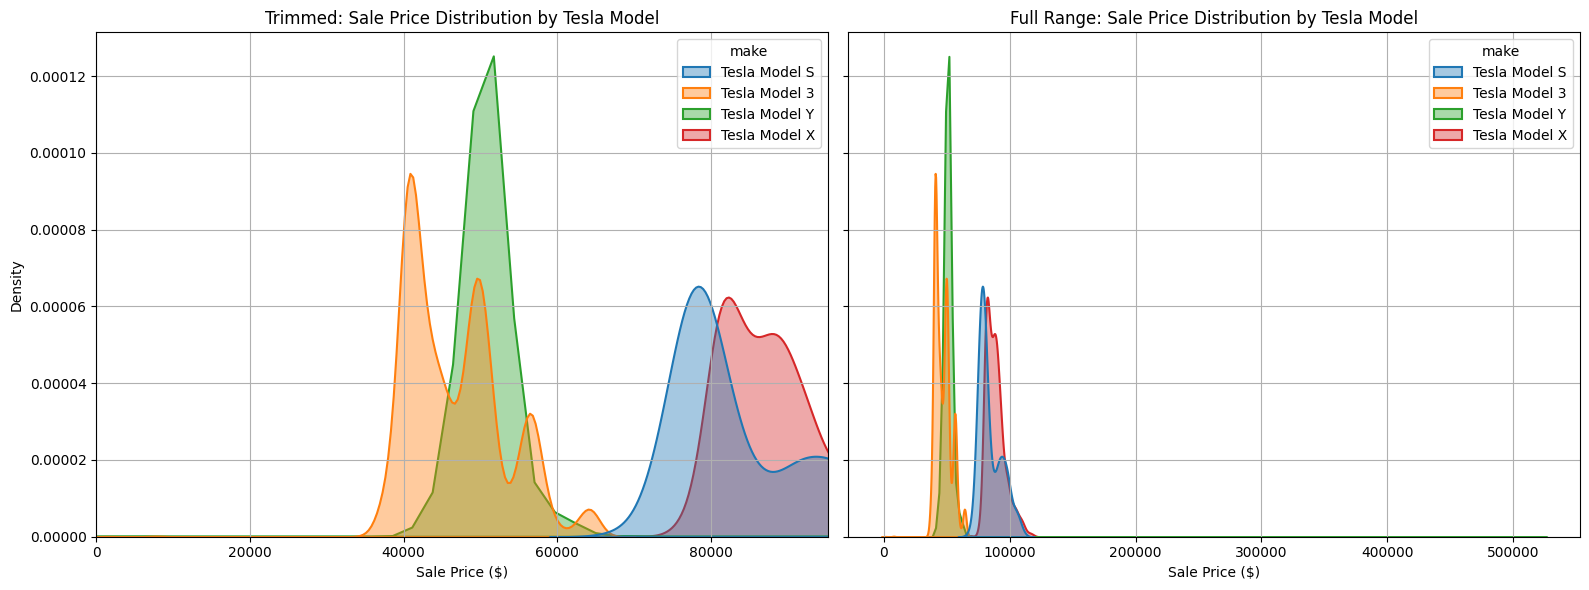

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Plot 1: With outliers trimmed (e.g., at 99th percentile) ---
sns.kdeplot(
    data=tesla_sale_data,
    x="Sale Price",
    hue="make",
    ax=axes[0],
    fill=True,
    alpha=0.4,
    linewidth=1.5,
    common_norm=False
)
axes[0].set_title("Trimmed: Sale Price Distribution by Tesla Model")
axes[0].set_xlim(0, tesla_sale_data["Sale Price"].quantile(0.99))
axes[0].set_xlabel("Sale Price ($)")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# --- Plot 2: Full range (no outlier trimming) ---
sns.kdeplot(
    data=tesla_sale_data,
    x="Sale Price",
    hue="make",
    ax=axes[1],
    fill=True,
    alpha=0.4,
    linewidth=1.5,
    common_norm=False
)
axes[1].set_title("Full Range: Sale Price Distribution by Tesla Model")
axes[1].set_xlabel("Sale Price ($)")
axes[1].set_ylabel("")
axes[1].grid(True)

plt.tight_layout()
plt.show()

There are two large price clusters: \\$40000-\\$60000 for Model 3 and Model Y, and around \\$80000 for Model X and Model S. This corresponds to their positioning and target audience: Model 3 for entry-level sedan, Model Y for compact SUV, Model S and X for luxury. Specifically, there seems to be three smaller clusters for Model 3, suggesting a pricing difference for different trims. There are also some extremely high outliers for Model X and S, which might be some rare high-end configurations, or might also be errors in the data, as the maximum value \\$522630 is not a reasonable price.

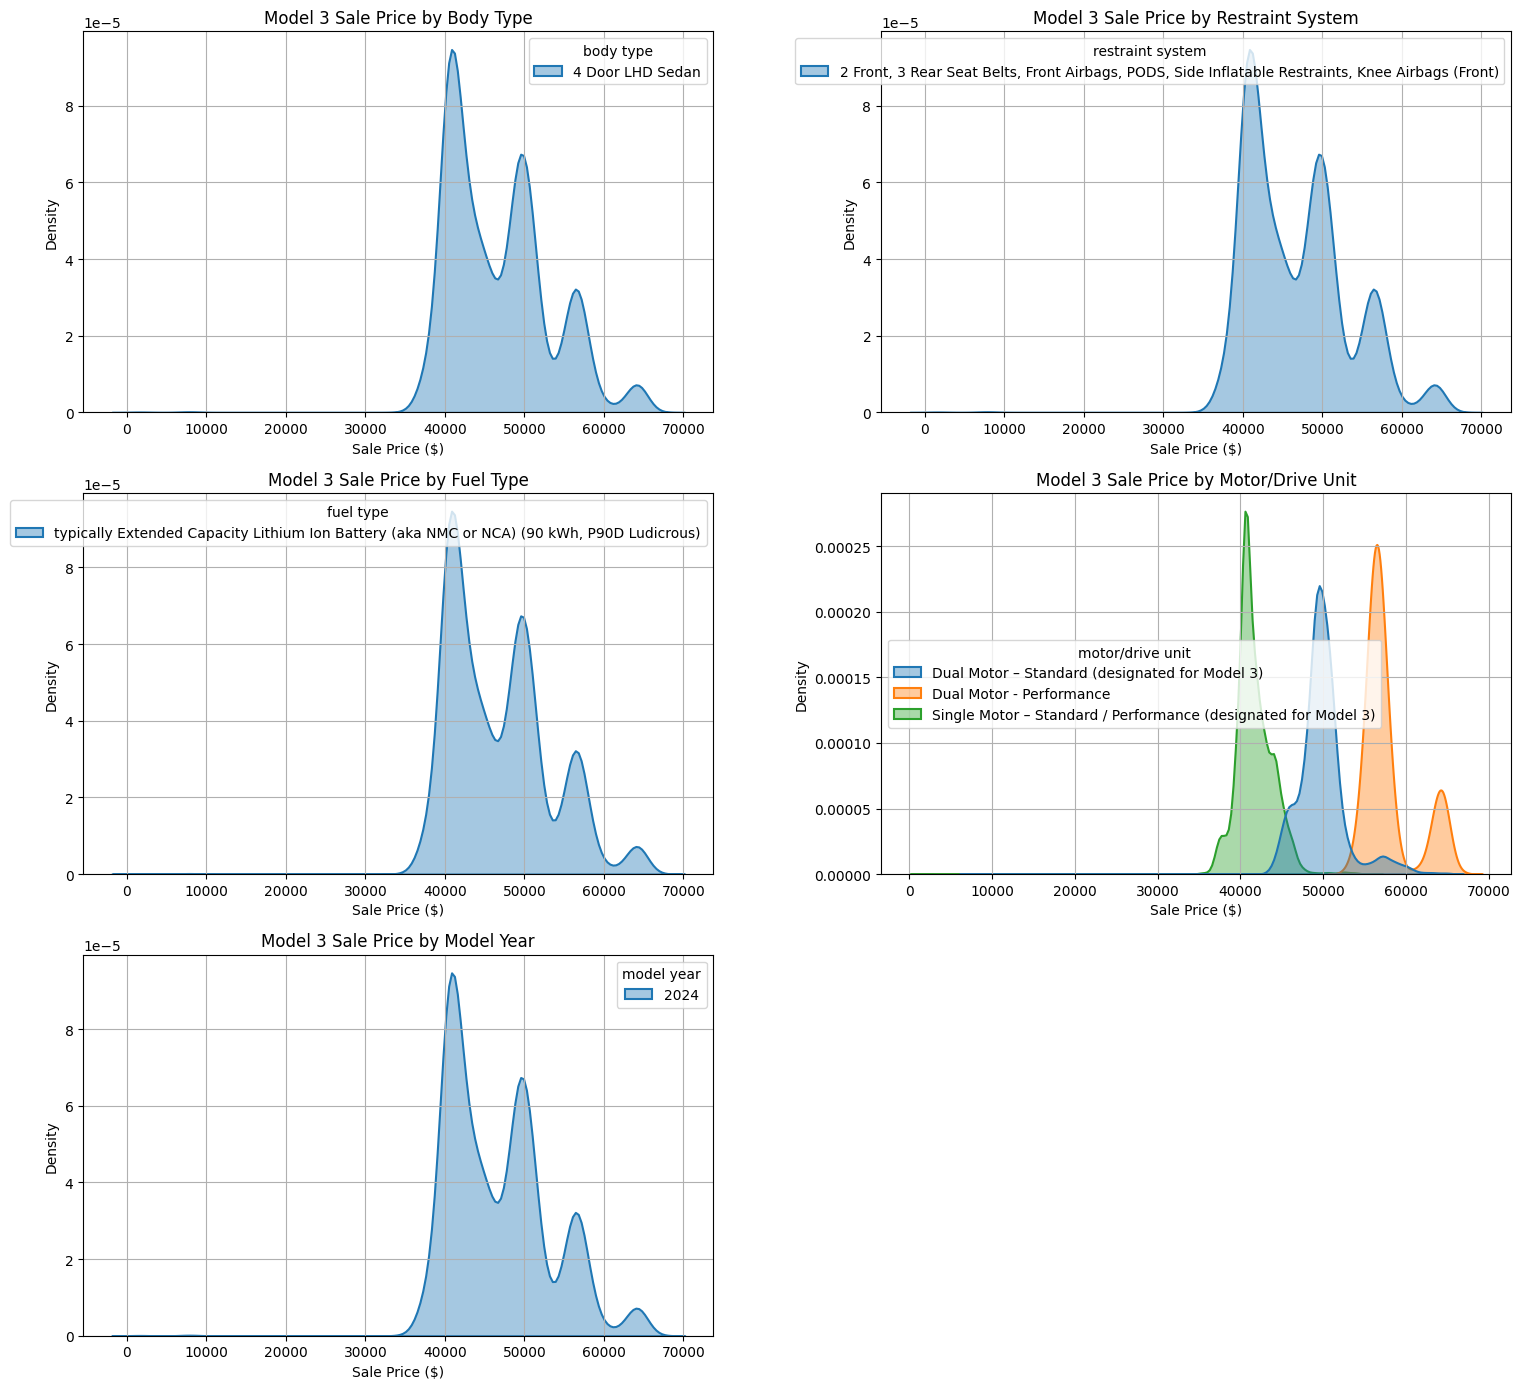

In [62]:
hue_attributes = [
    ("body type", "Body Type"),
    ("restraint system", "Restraint System"),
    ("fuel type", "Fuel Type"),
    ("motor/drive unit", "Motor/Drive Unit"),
    ("model year", "Model Year")
]

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for i, (hue_col, title_suffix) in enumerate(hue_attributes):
    sns.kdeplot(
        data=tesla_sale_data[tesla_sale_data["make"] == "Tesla Model 3"],
        x="Sale Price",
        hue=hue_col,
        fill=True,
        alpha=0.4,
        linewidth=1.5,
        common_norm=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Model 3 Sale Price by {title_suffix}")
    axes[i].set_xlabel("Sale Price ($)")
    axes[i].set_ylabel("Density")
    axes[i].grid(True)

# Hide any unused subplot (if odd number)
for j in range(len(hue_attributes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Motor/drive unit is the only varying factor within Model 3 vehicles, and it accounts for most of the price variances. The single motor vehicles are around \$40000, the standard dual motor ones are around \$50000, and the performance dual motors ones are even higher at price. However, it could be seen from the plot that there are still two individual clusters within performance dual motor categories, suggesting more factors are at play.

# Comparative Analysis
Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation.  Note that for some projects, the nature of this comparative analysis will be obvious.  For others, you will need to think about how you might subset your data.

Discuss any notable similarities or differences you have identified.


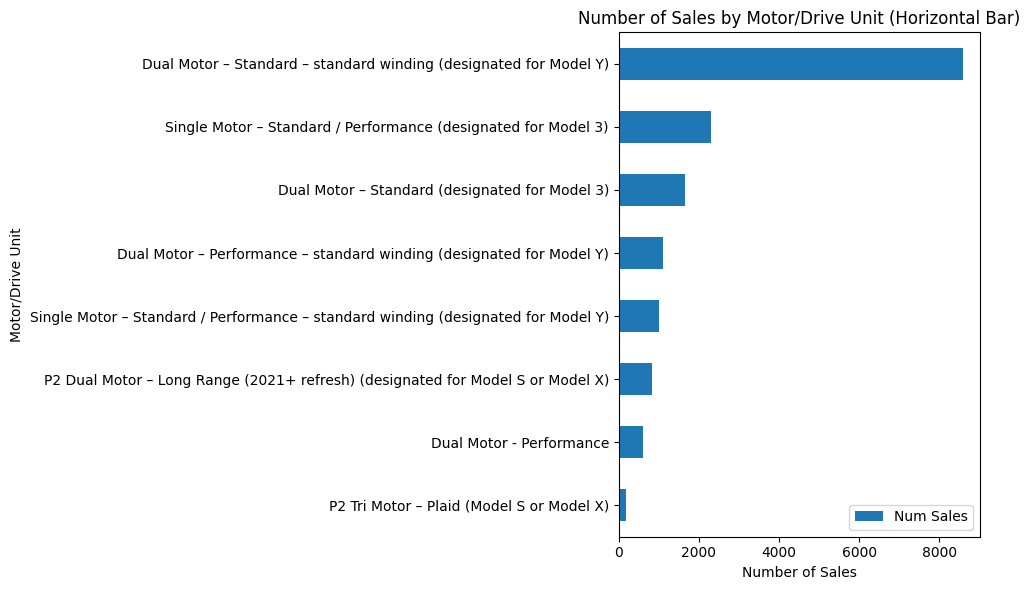

In [ ]:
# Count how many sold group by motor/drive unit
motor_counts = (
    tesla_sale_data.groupby("motor/drive unit")["Sale Price"]
    .size()
    .reset_index(name="Num Sales")
)

# Sort
motor_counts.sort_values("Num Sales", ascending=True, inplace=True)

# Create a horizontal bar chart
ax = motor_counts.plot(
    x="motor/drive unit",
    y="Num Sales",
    kind="barh",
    figsize=(10, 6),
    title="Number of Sales by Motor/Drive Unit"
)
ax.set_xlabel("Number of Sales")
ax.set_ylabel("Motor/Drive Unit")
plt.tight_layout()
plt.show()

The horizontal bar chart shows the number of Tesla vehicle sales, grouped by the motor/drive unit type. It showed:
1. **The Dual Motor – Standard (Model Y)** is the most popular motor unit.
2. Most of the top-selling motor types are associated with **Model Y** and **Model 3**.
3. Dual motor is more popular for Model Y, but single motor leads for Model 3. This may be because the single motor version of Model 3 is the cheapest, according to the sale price data shown in the graphical analysis

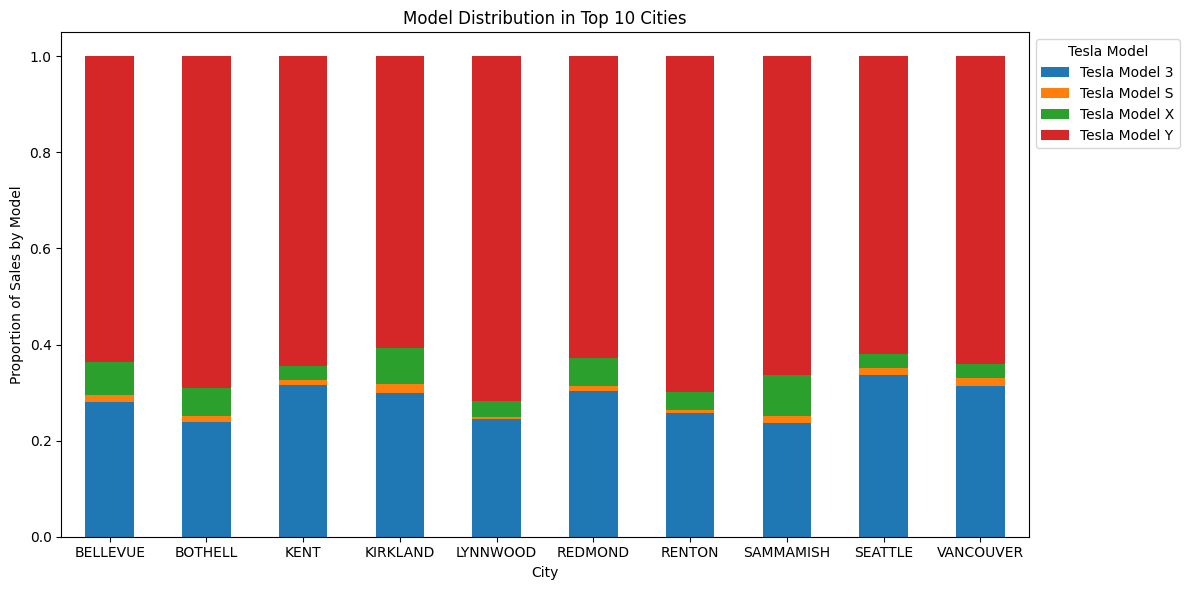

In [64]:
# Identify top 10 cities by number of Tesla sales
top10_cities = tesla_sale_data["City"].value_counts().head(10).index
df_top10 = tesla_sale_data[tesla_sale_data["City"].isin(top10_cities)].copy()

# Count how many of each model are sold in each city
city_model_count = (
    df_top10.groupby(["City", "make"])
    .size()
    .reset_index(name="count")
)

# Get total sales per city
city_totals = city_model_count.groupby("City")["count"].sum().reset_index(name="total_count")

# Merge totals back and compute proportion of each model
merged = city_model_count.merge(city_totals, on="City", how="left")
merged["proportion"] = merged["count"] / merged["total_count"]

# Pivot to create a matrix of City (rows) x Model (columns) for proportions
pivot_proportion = (
    merged.pivot(index="City", columns="make", values="proportion")
    .fillna(0)
    .sort_index()
)

# Create a stacked bar chart
ax = pivot_proportion.plot(kind="bar", stacked=True, figsize=(12, 6))
ax.set_xlabel("City")
ax.set_ylabel("Proportion of Sales by Model")
ax.set_title("Model Distribution in Top 10 Cities")
plt.legend(title="Tesla Model", bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the figure, some conclusion can be gained:
1. Model Y dominates across all cities, which aligns with the founding that the Dual Motor version of model Y is the most popular one.
2. Model 3 holds second place in all cities. It is still competitive in urban areas like Seattle.

# Multivariate Analysis
Perform multivariate analysis to understand the relationships among three or more variables in your dataset.

Use techniques like cross-tabulation, pivot tables, and multivariate graphs.


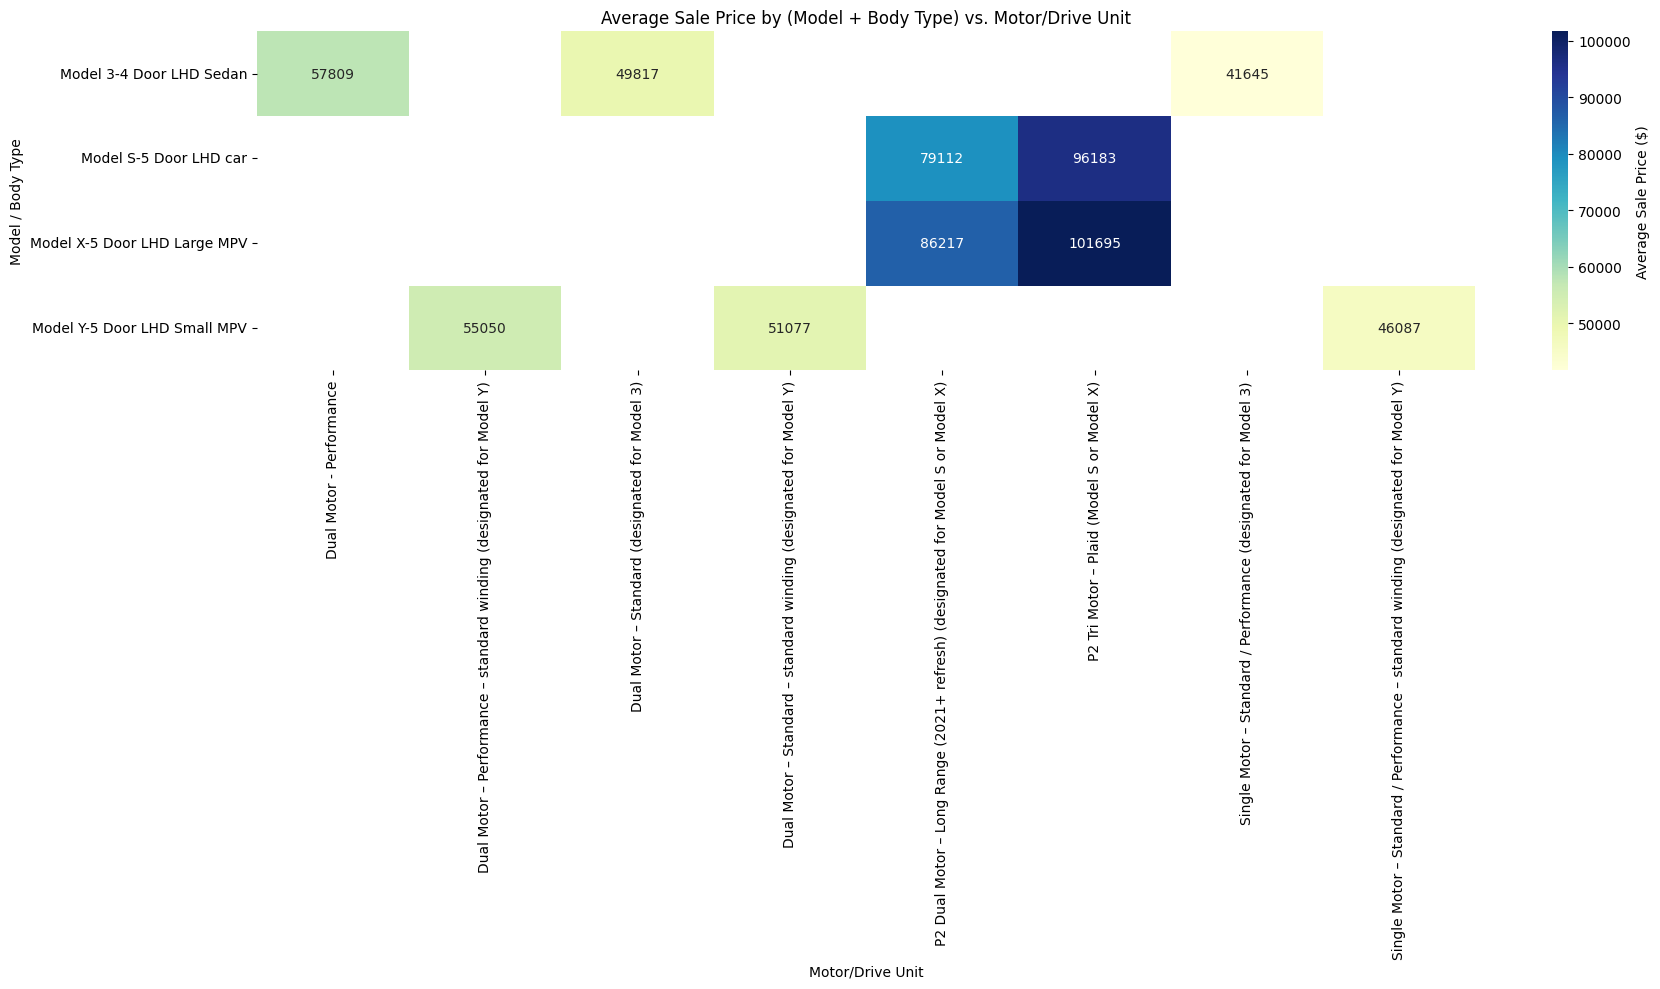

In [ ]:
# 1) Create a pivot table: Rows: Model + Body Type; Columns: Motor/Drive Unit; Values: Average Sale Price
pivot_table = pd.pivot_table(
    tesla_sale_data,
    index=["Model", "body type"],
    columns="motor/drive unit",
    values="Sale Price",
    aggfunc="mean"
)

# 2) Visualize with a heatmap
plt.figure(figsize=(18, 10))

sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Average Sale Price ($)'}
)

plt.title("Average Sale Price by (Model + Body Type) vs. Motor/Drive Unit")
plt.ylabel("Model / Body Type")
plt.xlabel("Motor/Drive Unit")

plt.tight_layout()
plt.show()


Based on the diagram, it showed:
1. The motor is a huge factor of the price. For the same Model and Body Type, the more motor it have, the higher the price.
2. Sedan are likely less expensive than MPVs.

# Synthesis
Synthesize the findings from your descriptive and inferential statistics along with your graphical analyses to answer your research questions.

Discuss how the combination of the datasets has provided added value in terms of insights or capabilities that would not be possible with the individual datasets in isolation.


Based on the analysis, we found that:
- Sale Price:
  - Mean: \$52,081
  - Median: \$50,630
  - Max: \$522,630
  - Standard Deviation: \$12,146
  - This indicates that more sales are around \$50–\$52k, but also some may be very expensive.

- Odometer Reading
  - Median, Mode, and 25th–75th Percentiles: 15 miles
  - Max: 93,024 miles
  - Most vehicles are essentially new, with a small amount of old cars.

- Motor/Drive Unit
  - Explains why the price varies in certain models (around 30–50% for S, 3, and X).
  - For Model Y, about 5–6% of the price variance is tied to motor/drive unit, indicating other factors also matter.

- Body Type
  - Corresponds to model families (S, 3, X, Y).
  - Accounts for roughly 58% of overall price variation across all Tesla models.

- Restraint System
  - More relevant for vehicles offering multiple seat configurations (X, Y).
  - In Model X, about half the price variance are related to this.
  - For Model Y, it accounts for a smaller price variance.

- Graph
  - Higher‐performance or Plaid trims change the price a lot.
  - Motor configuration and body style also influence the price a lot.

By combing data of vehicle specification and sales records, we can identify which features change the price, and uncover the full pattern of price variation. As a conclusion, we can use such data and analysis to answer our research question: Which EV features most influence consumer decisions and sale prices?

As a result, we found that key vehicle features—such as motor/drive configuration, body style, and seating options—play the biggest roles in determining sale prices. By merging the detailed specification data with real‐world sales records, we can not only determine which features are more influential, but also quantify how they affect final transaction values.

# Documentation
Outline the steps you took in your analysis, providing the rationale for the choice of tools and techniques.

Clearly document your code, analyses, and interpretations so that they are understandable and reproducible.


# Reporting & Interpretation
Prepare markdown blocks that summarize your methodology, analysis, and findings.  You should intersperse these with your code.

Your notebook should be well-structured, with clear sections, headings, and subheadings.


# Reflection
Include a section (using one or more markdown blocks) at the end of your notebook in which you reflect on the process of analyzing the data. Discuss any challenges you encountered and how you overcame them.

Critically evaluate the limitations of your analysis and suggest areas for further research or improvement.
